In [6]:
library(ggplot2)
library(tidyverse)
library(ggpubr)
library(reshape2)

In [7]:
data <- read_csv('../results/evaluation.csv')

Rows: 264 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): dataset
dbl (6): cells, noise, seed, global_score, noise_level, run_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
data <- data %>% 
  mutate(across('dataset', str_replace, 'merfish_mouse_hypothalamic', 'MERFISH')) %>%
  mutate(across('dataset', str_replace, 'visium_human_DLPFC', 'Visium')) %>%
  mutate(across('dataset', str_replace, 'stereo_mouse_embryo', 'Stereo-seq'))
data$dataset <- factor(data$dataset, levels = c('Visium','MERFISH','Stereo-seq'))
head(data,4)

dataset,cells,noise,seed,global_score,noise_level,run_time
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MERFISH,0,0,0,0.4600749,0,15.10111
MERFISH,0,0,1,0.4603868,0,15.44310
MERFISH,0,0,2,0.4639738,0,14.88637
MERFISH,0,0,3,0.4625702,0,24.25926


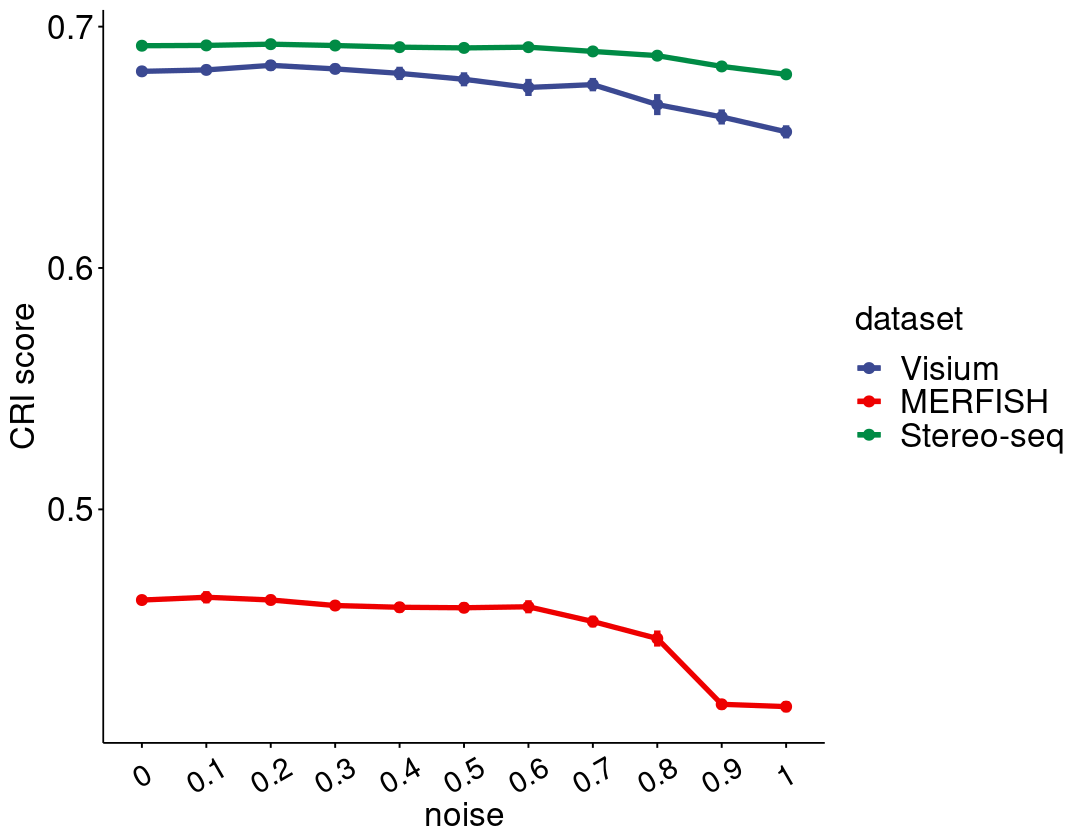

In [12]:
options(repr.plot.width=9, repr.plot.height=7)
ggline(data, x="noise", y="global_score", palette='aaas', color="dataset",
     add="mean_se", xlab =F ,ylab='CRI score', size=1.5, lab.size=10) %>% 
ggpar(legend='right', font.legend=20, font.subtitle=20, font.xtickslab=18, font.ytickslab=20, font.y=20, font.x=20) + 
theme(axis.text.x=element_text(angle=30, vjust=0.5, hjust=0.5))